# IMAGE STYLE TRANSFER

In this tutorial, we are going to transfer the style from a famous painting to any photo using convolutional neural network. Intereting right? I will go step by step to show you how. However, this jupyter notebook only shows how to use a pre-trained checkpoint of style transfer algorithm to do the magic. Please refer to the algorithm jupyter notebook to understand how the algorithm is built. 

We are going to use VGG19, a per-trained model, to build our algorithm. The idea is first presented by [Gatys et al](https://arxiv.org/abs/1508.06576). Basically, you'll have two input images, a content image and a style image. And we wanna produce a mixed image which contains style (such as texture, colour) from style image and content from content image. In convolutional neural network, the feature maps in lower layers captures the low level features (i.e. content) and vice versa, the feature maps in higher layers captures the high level features (i.e. style). Measuring low level features would not be able to capture perceptual defferences between output and ground truth images. Gatys et al proposal using high level features to obtain the style of the image and therefore reduce the perceptual differences. Moreover, [Johnson et al](http://cs.stanford.edu/people/jcjohns/eccv16/) improves Gatys et al's work by training a feed forward transformation networks ahead. We build a pre-trained checkpoint and save it. Later on, if we wanna create a mixed image, we can use the pre-trained checkpoint and let a photo flow through the image trnasform net. And a mixed image is created! 

The system overview is shown below. We will use this system to build our style transfer algorithm.

This code work is based on [Logan Engstrom](https://github.com/lengstrom/fast-style-transfer) and [Magnus Erik Hvass Pedersen](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/15_Style_Transfer.ipynb).

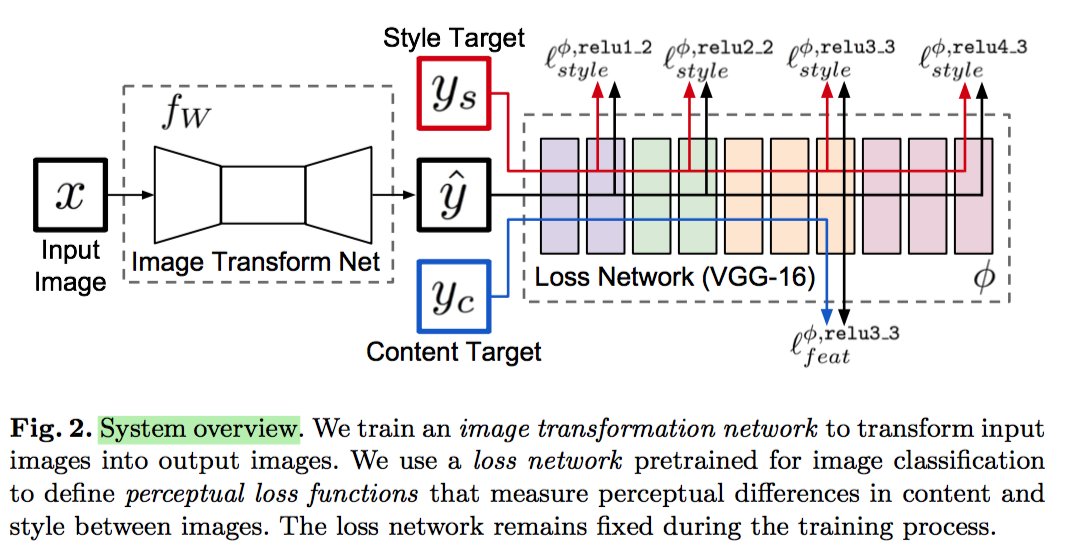

## Import Libraries

### Prerequisites

- tensorflow

- numpy

- PIL

- matplotlib

Package version below had been checked running sucessfully. If there is a version conflict, please file an issue.

- python (Anaconda) == 3.5.4

- tensorflow == 1.4.0

- numpy == 1.13.3

- PIL == 4.2.1

- matplotlib == 2.0.2

In [1]:
import tensorflow as tf
import numpy as np
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import image_transform_net

## Helper Function to Save Image in Your Disk

Fist, let's build a function to save image.

In [2]:
def save_image(image, file_path):
    '''
    Save an image as a jpg file. The image is given as 
    a numpy array with pixel values between 0 and 255.
    
    :param image:
        The numpy array of the image.
        type: ndarray
    :param file_path:
        The full path to save the mixed image, 
        i.e. image path + image name
        type: str
    :return:
        Save the image as a jpeg file.
    '''
    
    # Ensure the pixel values are between 0 and 255.
    image = np.clip(image, 0.0, 255.0)
    
    # Convert to bytes.
    image = image.astype(np.uint8)
    
    # Write the image file in jpeg format.
    with open(file_path, 'wb') as file:
        PIL.Image.fromarray(image).save(file, 'jpeg')

In [3]:
def feed_forward(image_path, output_path, checkpoint_dir, style_path=None):
    '''
    Since we already have a pre-trained checkpoint, we could 
    just use it to generate a mixed image.
    
    :param image_path:
        The path and filename that you are going to tranfer.
        type: str
    :param style_path:
        The path and filename of the style image.
        This is just for displaying and has nothing with 
        the evaluation.
        type: str
    :param output_path:
        The path to store the mixed image, including its filename.
        type: str
    :param checkpoint_dir:
        The path and filename of the pre-trained checkpoint.
        type: str
    :return:
        Save the mixed image and display image.
    '''
    
    # Build a graph and a session.
    with tf.Graph().as_default(), tf.Session() as sess:
        # Read content image from a file as a numpy array.
        content_image = mpimg.imread(image_path)
        
        # Read style image from a file if provided.
        if style_path is not None:
            style_image = mpimg.imread(style_path)
        
        # Since image transform net requires a 4-D array,
        # we'll have to expand a dimension at axis = 0.
        content_image = np.expand_dims(content_image, axis=0)
        
        # Define a 4-D placeholder for image.
        image_holder = tf.placeholder(
            tf.float32, content_image.shape, 'input_image')
        
        # Let image flow through image transform net.
        output_image = image_transform_net.net(image_holder)
        
        # Restore the pre-trained checkpoint.
        saver = tf.train.Saver()
        saver.restore(sess, checkpoint_dir)
        
        # Run the session.
        feed_dict = {image_holder: content_image}
        mixed_image = sess.run(output_image, feed_dict)
        
        # Save the mixed image.
        with open(output_path, 'wb') as file:
            save_image(mixed_image[0], output_path)
        
        # If style image is provided, display content, mixed, style image.
        if style_path is not None:
            fig, axes = plt.subplots(1, 3, figsize=(20, 20))
            
        # If style image is not provided, display content, mixed image.
        else:
            fig, axes = plt.subplots(1, 2, figsize=(20, 20))
        
        # Use interpolation to smooth pixels
        smooth = True

        # Interpolation type.
        if smooth:
            interpolation = 'sinc'
        else:
            interpolation = 'nearest'
            
        # Plot the content image.
        # Note that the pixel values are normalized to
        # the [0.0, 1.0] range by dividing with 255.
        ax = axes.flat[0]
        ax.imshow(content_image[0] / 255.0, interpolation=interpolation)
        ax.set_xlabel('Content')

        # Plot the mixed image.
        ax = axes.flat[1]
        ax.imshow(mixed_image[0] / 255.0, interpolation=interpolation)
        ax.set_xlabel('Mixed')
        
        if style_path is not None:
            # Plot the style image
            ax = axes.flat[2]
            ax.imshow(style_image / 255.0, interpolation=interpolation)
            ax.set_xlabel("Style")
        
        # Remove ticks from all the plots.
        for ax in axes.flat:
            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
        plt.show()


## Let's play with it!

Git clone this repository and download the pre-trained checkpoints [here](https://drive.google.com/drive/folders/0B9jhaT37ydSyRk9UX0wwX3BpMzQ?usp=sharing) which is provided by [Logan Engstrom](https://github.com/lengstrom/fast-style-transfer).

Change the INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR below. The running time takes only for seconds at a regular laptop.

Have fun!

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/la_muse.ckpt


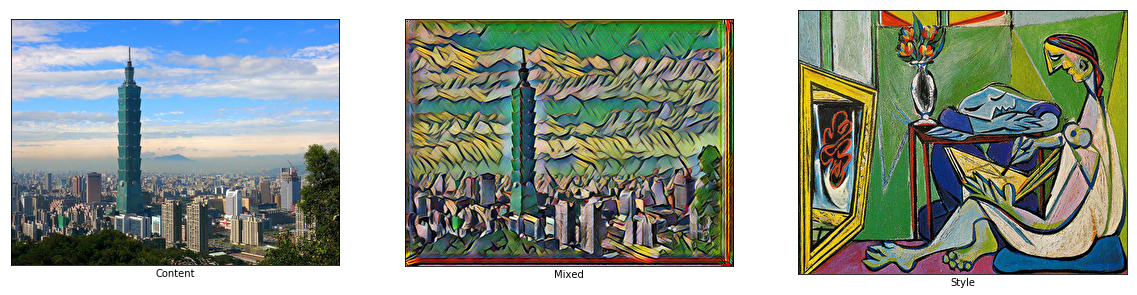

In [4]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_la_muse.jpg'
CHECKPOINT_DIR = 'la_muse.ckpt'
STYLE_PATH = 'images/la_muse.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/rain_princess.ckpt


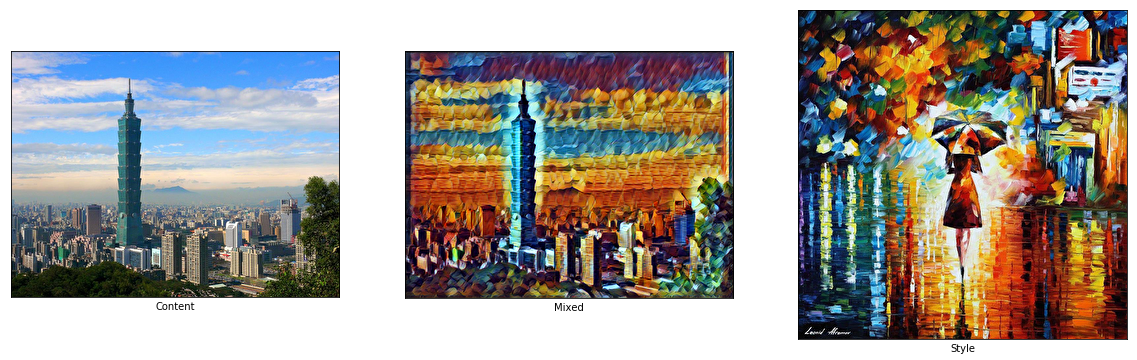

In [5]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_rain_princess.jpg'
CHECKPOINT_DIR = 'rain_princess.ckpt'
STYLE_PATH = 'images/rain_princess.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/scream.ckpt


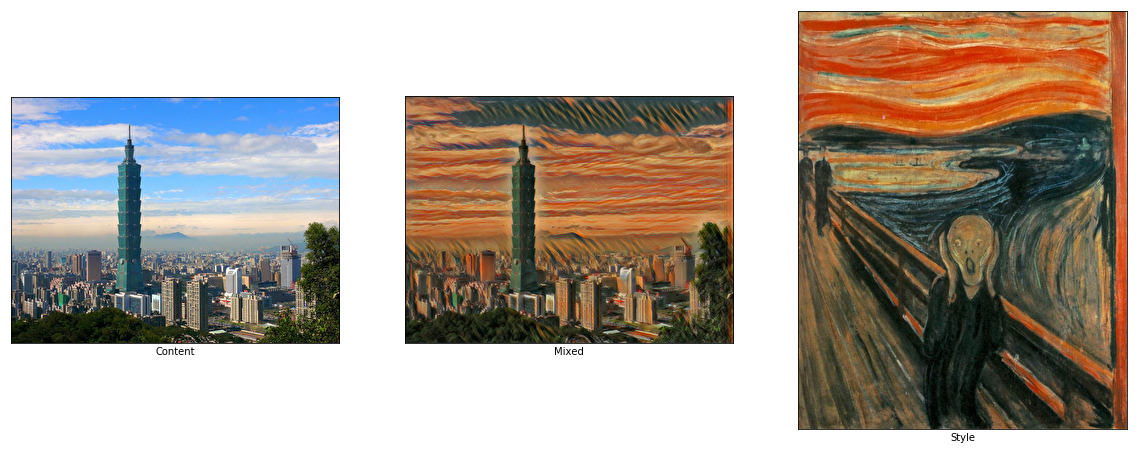

In [6]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_scream.jpg'
CHECKPOINT_DIR = 'scream.ckpt'
STYLE_PATH = 'images/scream.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/udnie.ckpt


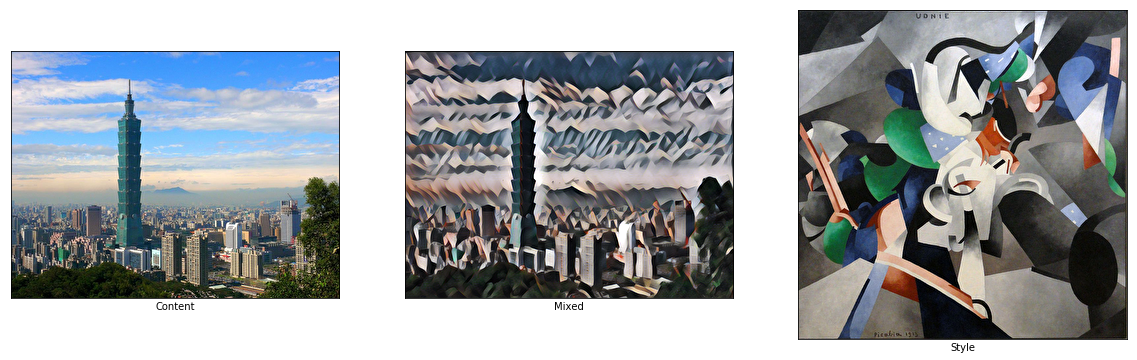

In [7]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_udnie.jpg'
CHECKPOINT_DIR = 'udnie.ckpt'
STYLE_PATH = 'images/udnie.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/wave.ckpt


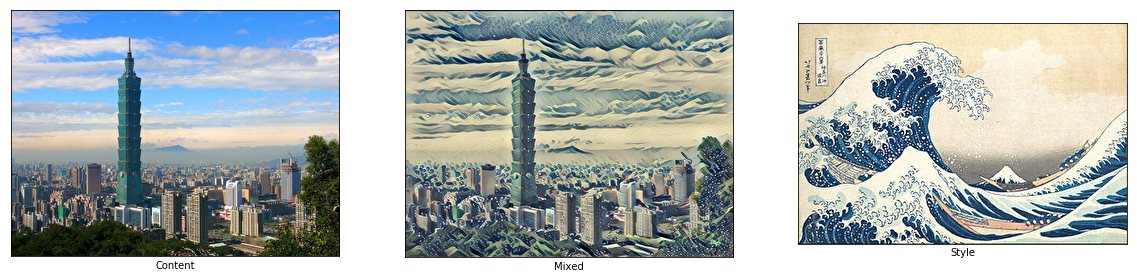

In [8]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_wave.jpg'
CHECKPOINT_DIR = 'wave.ckpt'
STYLE_PATH = 'images/wave.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

INFO:tensorflow:Restoring parameters from /Volumes/ChenTingHao/Dataset/fast-style-transfer-checkpoints/wreck.ckpt


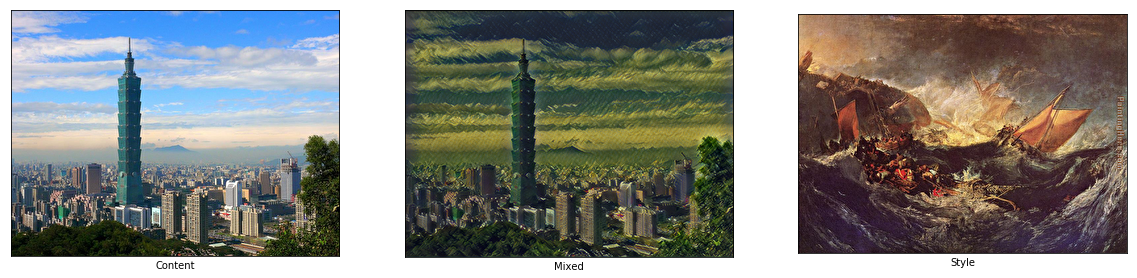

In [9]:
INPUT_PATH = 'images/taipei101.jpg'
OUTPUT_PATH = 'images/taipei_wreck.jpg'
CHECKPOINT_DIR = 'wreck.ckpt'
STYLE_PATH = 'images/wreck.jpg' # Optional. Only for displaying it.

# Run the code.
feed_forward(INPUT_PATH, OUTPUT_PATH, CHECKPOINT_DIR, STYLE_PATH)

In [10]:
# Convert this notebook to a README.
!jupyter nbconvert --to markdown play.ipynb
!mv play.md README.md

[NbConvertApp] Converting notebook play.ipynb to markdown
[NbConvertApp] Support files will be in play_files/
[NbConvertApp] Making directory play_files
[NbConvertApp] Making directory play_files
[NbConvertApp] Writing 10803 bytes to play.md
